<a href="https://colab.research.google.com/github/nikhardoshi/MultipleDiseasePredictionSystem/blob/main/Multiple_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

Really Important Link about Feature Scaling

# **Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score
import pickle

# **Extra Functions**

In [ ]:
def display_plot(xline,dataset,typ,rows=2,coll=2,fig=[8,6],y=None,hue=None):
  fig,axes = plt.subplots(rows,coll,figsize=fig)
  i=0 
  for j in range(0,len(xline)):
    if j%coll==0 and j!=0:
      i+=1
    if typ=='count':
      sns.countplot(ax=axes[i,j%coll],data=dataset, x=xline[j],hue=hue)
    elif typ=='hist':
      sns.histplot(ax=axes[i,j%coll],data=dataset,x=xline[j],y=y)
    elif typ=='scatter':
      sns.scatterplot(ax=axes[i,j%coll],data=dataset,x=xline[j],y=y)
    elif typ=='line':
      sns.lineplot(ax=axes[i,j%coll],data=dataset,x=xline[j],y=y)
    elif typ=='box':
      sns.boxplot(ax=axes[i,j%coll],data=dataset,x=xline[j],y=y)
#Error that I had while defining function: 
#https://stackoverflow.com/questions/24719368/syntaxerror-non-default-argument-follows-default-argument

#Another error when trying to display the numeric data
#https://stackoverflow.com/questions/52273546/matplotlib-typeerror-axessubplot-object-is-not-subscriptable

In [ ]:
lr=LogisticRegression()
gsb=GaussianNB()
svc=SVC()
rf=RandomForestClassifier()
tr=DecisionTreeClassifier()
xgb=XGBClassifier()
knn=KNeighborsClassifier()

model_ls=[lr,svc,rf,tr,knn]
model_params={
    'LogisticRegression()': {
        
        'C' : [1,5,10,20,50,75]
    },
    'SVC()': {
        
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,3,5,7,10]
    },
    'KNeighborsClassifier()' : {
        
        'n_neighbors' : [2,3,4,5,10]
    },
    'DecisionTreeClassifier()' : {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'splitter':['best','random']
    },
    'RandomForestClassifier()' : {
        
        'n_estimators' : [10, 20, 50, 100],
        'criterion': ['gini', 'entropy', 'log_loss']
    }
}

In [ ]:
def mod_selection(X,y):
  result=[]
  for i in model_ls:
  #   print(i)
  #   print(model_params[str(i)])
    cls=GridSearchCV(i,model_params[str(i)],cv=5)
    cls.fit(X,y)
    result.append({
        'model used' : i,
        'highest score' : cls.best_score_,
        'best hyperparameters' : cls.best_params_
    })
  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])
  return result_dataframe

In [ ]:
def model_test(model,y_test,X_test):
  eval=accuracy_score(y_test,model.predict(X_test))
  return eval

def metricsreport(model,y_test,X_test):
  y_preds=model.predict(X_test)
  print("Classification Report: \n",classification_report(y_test,y_preds))

def confmatrix(model,y_test,X_test):
  y_preds=model.predict(X_test)
  plt.figure(figsize=[18,22])
  cm=confusion_matrix(y_true=y_test,y_pred=y_preds,labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()
  plt.show()

# **Heart Disease Prediction**

In [ ]:
dheart=pd.read_csv('/content/drive/MyDrive/ML_Datasets/heart.csv')
dheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dheart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dheart.drop_duplicates(inplace=True)

In [ ]:
for i in dheart.columns:
  print(dheart[i].value_counts())
  print('\n')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64


1    206
0     96
Name: sex, dtype: int64


0    143
2     86
1     50
3     23
Name: cp, dtype: int64


120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: tres

In [ ]:
dheart.describe()
cols=dheart.columns

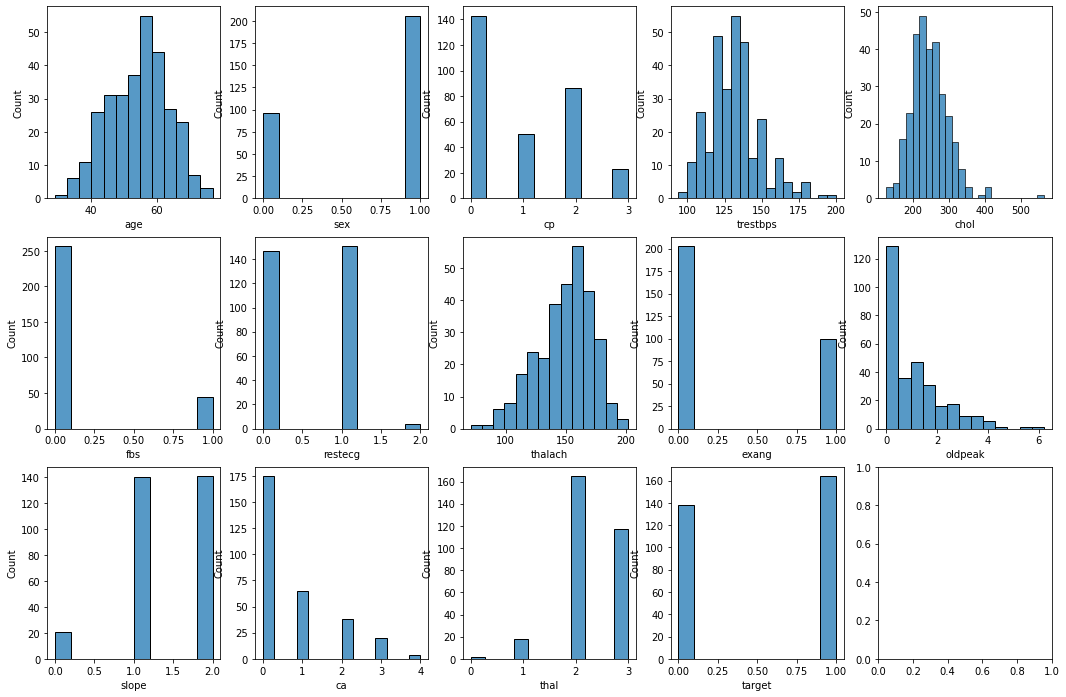

In [ ]:
display_plot(xline=cols,dataset=dheart,typ='hist',fig=[18,12],rows=3,coll=5)

In [ ]:
dheart[dheart['chol']>430]
# dheart[dheart['oldpeak']>4.5]
# dheart[dheart['thal']<1]
dheart[(dheart['trestbps']>175) & (dheart['target']==1)]
# dheart[(dheart['restecg']>1.5) & (dheart['target']==1)]
# dheart[(dheart['ca']>3) & (dheart['target']==0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1


In [ ]:
dheart=dheart[dheart['chol']<430]
dheart=dheart[dheart['oldpeak']<4.5]
dheart=dheart[dheart['thal']>=1]

temp=dheart[(dheart['trestbps']>175) & (dheart['target']==0)]
dheart=dheart[(dheart['trestbps']<=175)]
dheart=dheart.append(temp)

temp=dheart[(dheart['restecg']>1.5) & (dheart['target']==0)]
dheart=dheart[(dheart['restecg']<=1.5)]
dheart=dheart.append(temp)

temp=dheart[(dheart['ca']>3) & (dheart['target']==1)]
dheart=dheart[(dheart['ca']<=3)]
dheart=dheart.append(temp)

In [ ]:
dheart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 163
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    int64  
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    int64  
 4   chol      293 non-null    int64  
 5   fbs       293 non-null    int64  
 6   restecg   293 non-null    int64  
 7   thalach   293 non-null    int64  
 8   exang     293 non-null    int64  
 9   oldpeak   293 non-null    float64
 10  slope     293 non-null    int64  
 11  ca        293 non-null    int64  
 12  thal      293 non-null    int64  
 13  target    293 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.3 KB


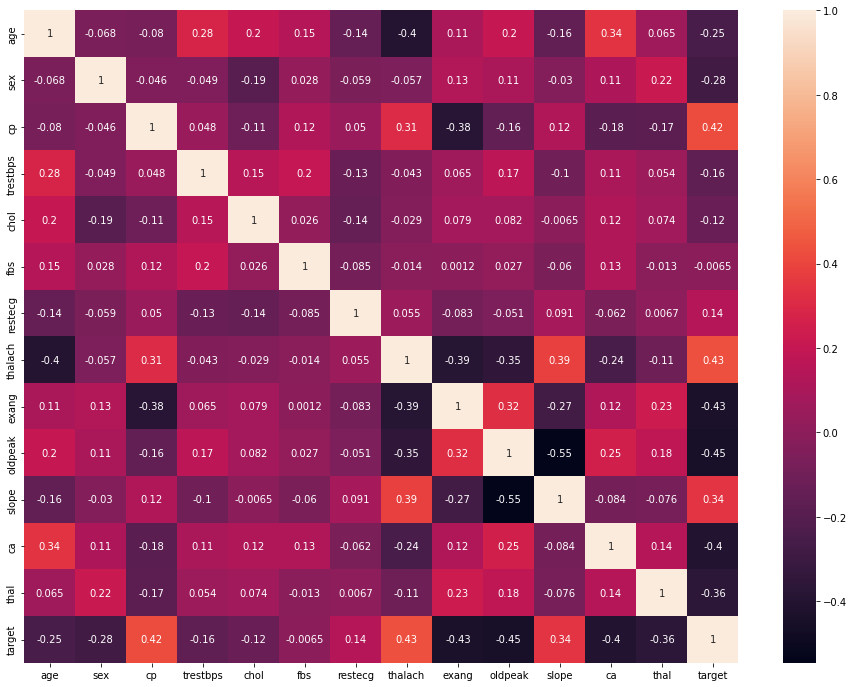

In [ ]:
plt.figure(figsize=[16,12])
sns.heatmap(dheart.corr(),annot=True)
plt.show()

In [ ]:
X=dheart.copy()
y=X.pop('target')
hearscale=MinMaxScaler()
X[X.columns]=hearscale.fit_transform(X[X.columns])

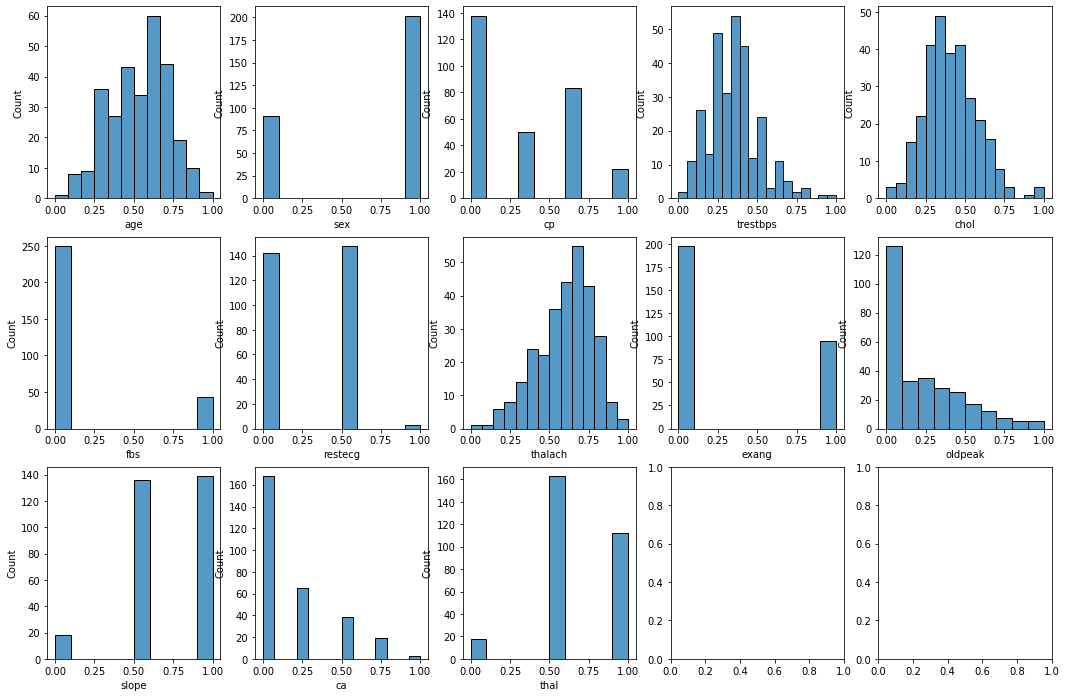

In [ ]:
display_plot(xline=X.columns,dataset=X,typ='hist',fig=[18,12],rows=3,coll=5)

In [ ]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.526664,0.689420,0.320819,0.350988,0.411914,0.146758,0.262799,0.602402,0.324232,0.228979,0.706485,0.179181,0.660410
std,0.187702,0.463523,0.342670,0.162896,0.166527,0.354470,0.260167,0.175191,0.468888,0.247026,0.302714,0.247197,0.292373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,0.000000,0.245283,0.292096,0.000000,0.000000,0.480916,0.000000,0.000000,0.500000,0.000000,0.500000
50%,0.541667,1.000000,0.333333,0.339623,0.395189,0.000000,0.500000,0.625954,0.000000,0.181818,0.500000,0.000000,0.500000
75%,0.666667,1.000000,0.666667,0.433962,0.512027,0.000000,0.500000,0.732824,1.000000,0.363636,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
mod_selection(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

,model used,highest score,best hyperparameters
0,LogisticRegression(),0.846347,{'C': 10}
1,SVC(),0.842899,"{'C': 3, 'kernel': 'linear'}"
2,RandomForestClassifier(),0.836002,"{'criterion': 'gini', 'n_estimators': 100}"
3,DecisionTreeClassifier(),0.754237,"{'criterion': 'entropy', 'splitter': 'best'}"
4,KNeighborsClassifier(),0.805435,{'n_neighbors': 10}


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)
# model=SVC(C= 1, kernel='poly')
model=LogisticRegression(C=10)	
model.fit(X_train,y_train)

LogisticRegression(C=10)

In [ ]:
model_test(model,y_test,X_test)

0.8513513513513513

<Figure size 1296x1584 with 0 Axes>

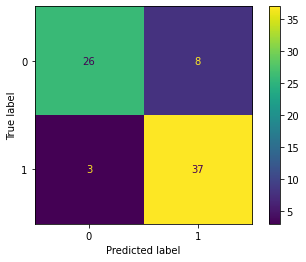

In [ ]:
confmatrix(model,y_test,X_test)

In [ ]:
metricsreport(model,y_test,X_test)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.82      0.93      0.87        40

    accuracy                           0.85        74
   macro avg       0.86      0.84      0.85        74
weighted avg       0.86      0.85      0.85        74



# **Parkinsons Disease Prediction**

In [ ]:
dpar=pd.read_csv('/content/drive/MyDrive/ML_Datasets/parkinsons.csv')
dpar.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
dpar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
dpar.drop(['name'],axis=1,inplace=True)

In [ ]:
dpar.drop_duplicates(inplace=True)

In [ ]:
dpar.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# for i in dpar.columns:
#   print(dpar[i].value_counts())
#   print('\n')
dpar['status'].value_counts()
#Status is our target variable

1    147
0     48
Name: status, dtype: int64

In [ ]:
dpar.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


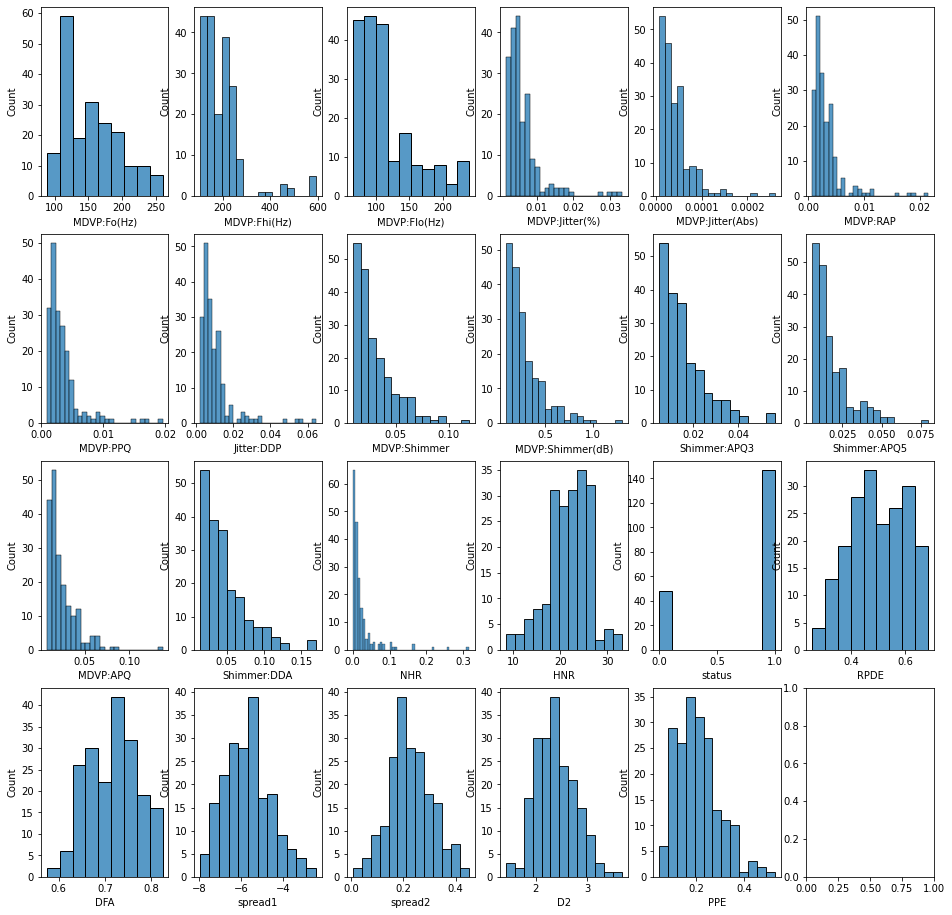

In [ ]:
display_plot(xline=dpar.columns,dataset=dpar,typ='hist',fig=[16,16],rows=4,coll=6)

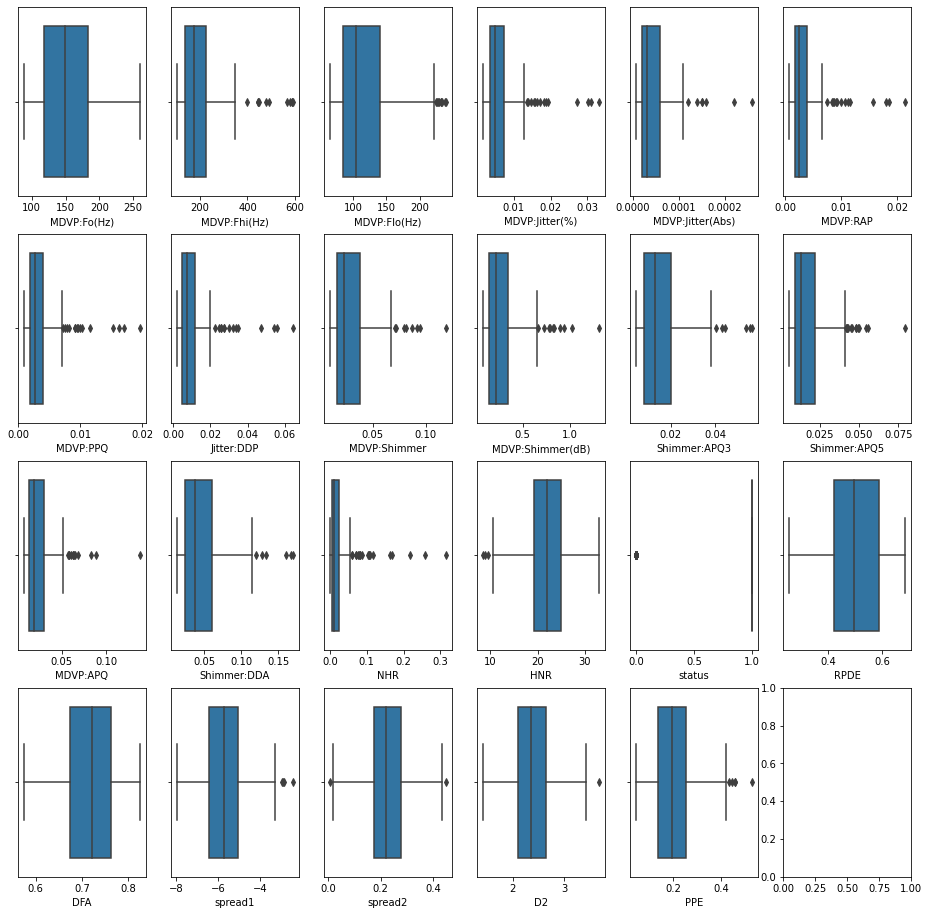

In [ ]:
display_plot(xline=dpar.columns,dataset=dpar,typ='box',fig=[16,16],rows=4,coll=6)

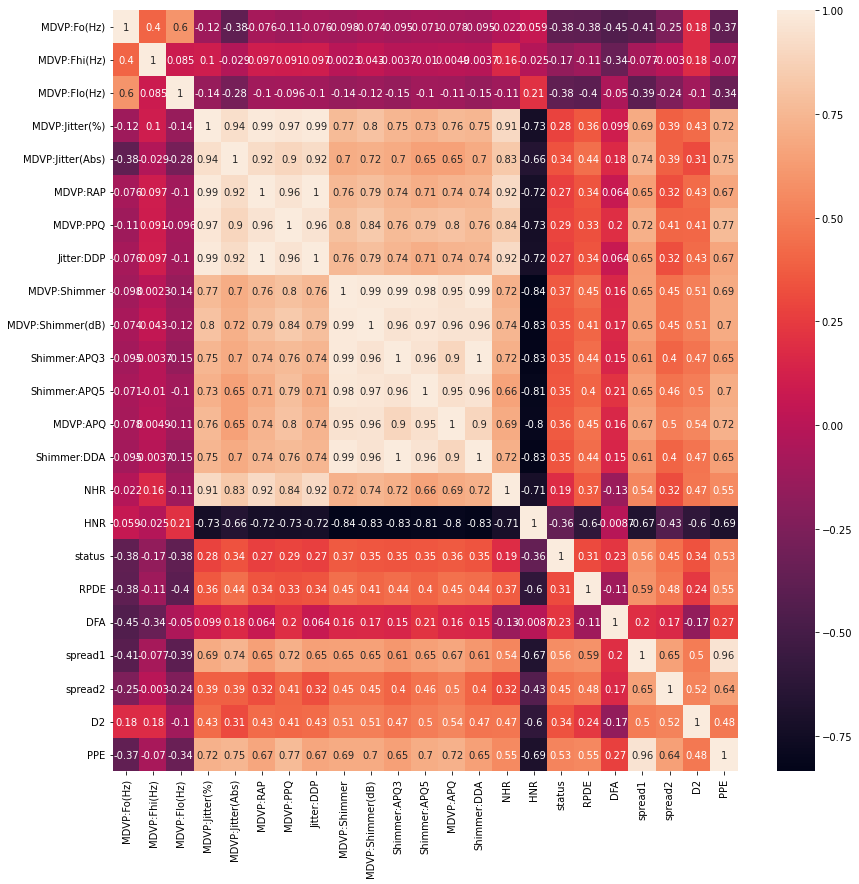

In [ ]:
plt.figure(figsize=[14,14])
sns.heatmap(dpar.corr(),annot=True)
plt.show()

In [ ]:
dpar.drop(['MDVP:Shimmer(dB)',	'Shimmer:APQ3',	'Shimmer:APQ5',	'MDVP:APQ',	'Shimmer:DDA','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP'],axis=1,inplace=True)

In [ ]:
dpar=dpar[dpar['spread2']<.4]
dpar=dpar[dpar['PPE']<0.5]
dpar=dpar[dpar['D2']<3.5]
dpar=dpar[dpar['NHR']<0.2]
dpar=dpar[dpar['HNR']>10]
dpar=dpar[dpar['spread1']<=-3]

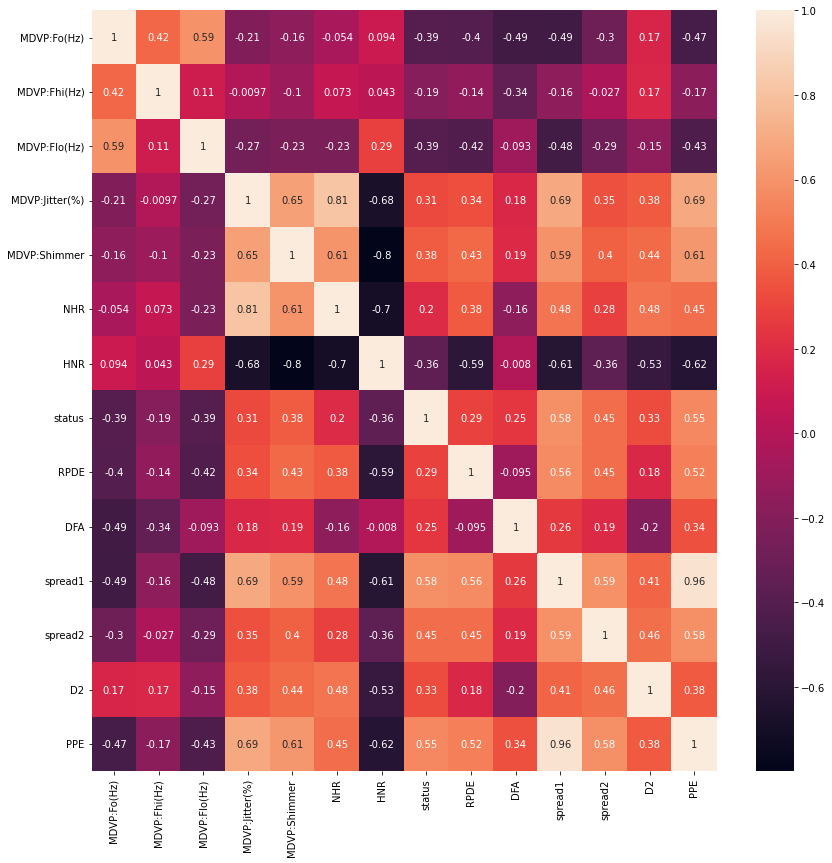

In [ ]:
plt.figure(figsize=[14,14])
sns.heatmap(dpar.corr(),annot=True)
plt.show()

In [ ]:
X1=dpar.copy()
y1=X1.pop('status')
parkscale=MinMaxScaler()
X1[X1.columns]=parkscale.fit_transform(X1[X1.columns])

In [ ]:
mod_selection(X1,y1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

,model used,highest score,best hyperparameters
0,LogisticRegression(),0.828165,{'C': 1}
1,SVC(),0.828592,"{'C': 1, 'kernel': 'rbf'}"
2,RandomForestClassifier(),0.806970,"{'criterion': 'gini', 'n_estimators': 10}"
3,DecisionTreeClassifier(),0.834566,"{'criterion': 'entropy', 'splitter': 'random'}"
4,KNeighborsClassifier(),0.802418,{'n_neighbors': 5}


In [ ]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X1,y1)
mod_selection(X_sm,y_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

,model used,highest score,best hyperparameters
0,LogisticRegression(),0.823636,{'C': 50}
1,SVC(),0.920779,"{'C': 5, 'kernel': 'rbf'}"
2,RandomForestClassifier(),0.938701,"{'criterion': 'entropy', 'n_estimators': 100}"
3,DecisionTreeClassifier(),0.902857,"{'criterion': 'gini', 'splitter': 'best'}"
4,KNeighborsClassifier(),0.895390,{'n_neighbors': 3}


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.25,stratify=y_sm,random_state=42)
model1=RandomForestClassifier(criterion='entropy',n_estimators=50)
model1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [ ]:
model_test(model1,y_test,X_test)

0.9142857142857143

In [ ]:
metricsreport(model1,y_test,X_test)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.89      0.91      0.90        35

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70



<Figure size 1296x1584 with 0 Axes>

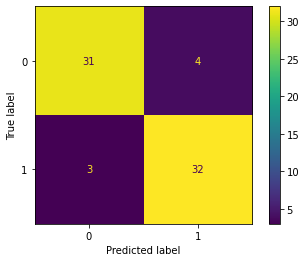

In [ ]:
confmatrix(model1,y_test,X_test)

# **Diabetes Prediction**

In [ ]:
diab=pd.read_csv('/content/drive/MyDrive/ML_Datasets/diabetes.csv')
diab.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diab.drop_duplicates(inplace=True)

In [ ]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# for i in diab.columns:
#   print(diab[i].value_counts())
#   print('\n')

In [ ]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


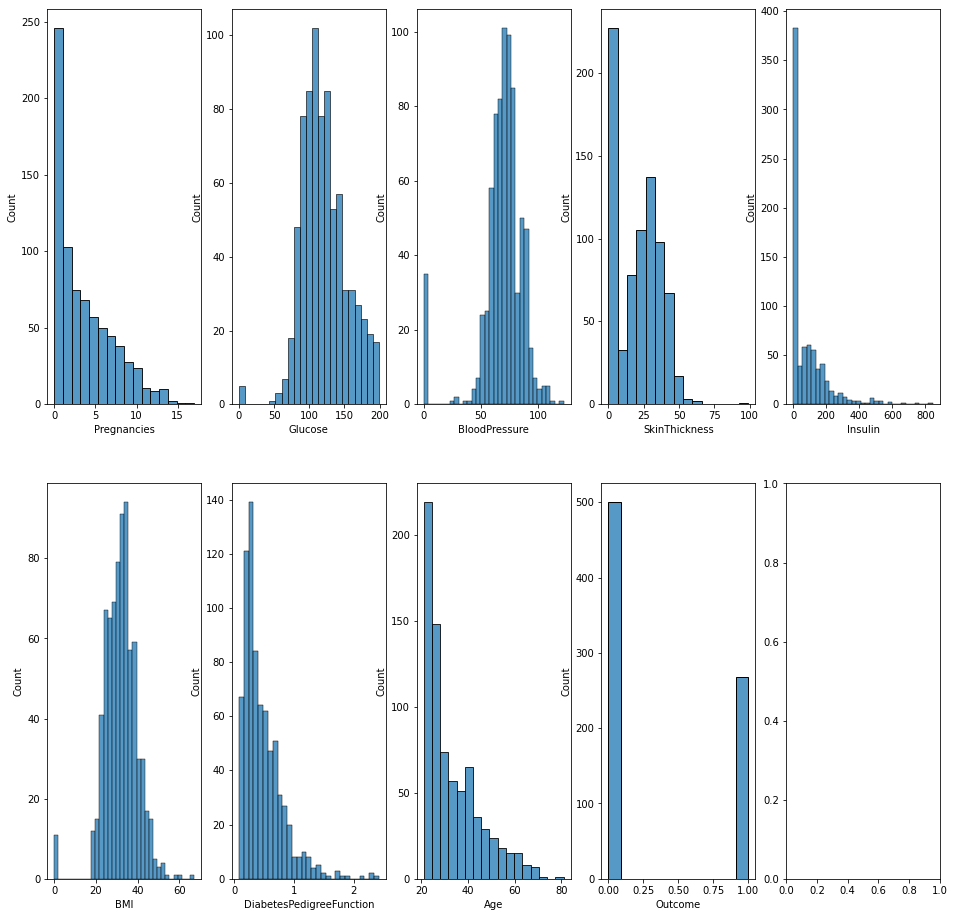

In [ ]:
display_plot(xline=diab.columns,dataset=diab,typ='hist',fig=[16,16],rows=2,coll=5)

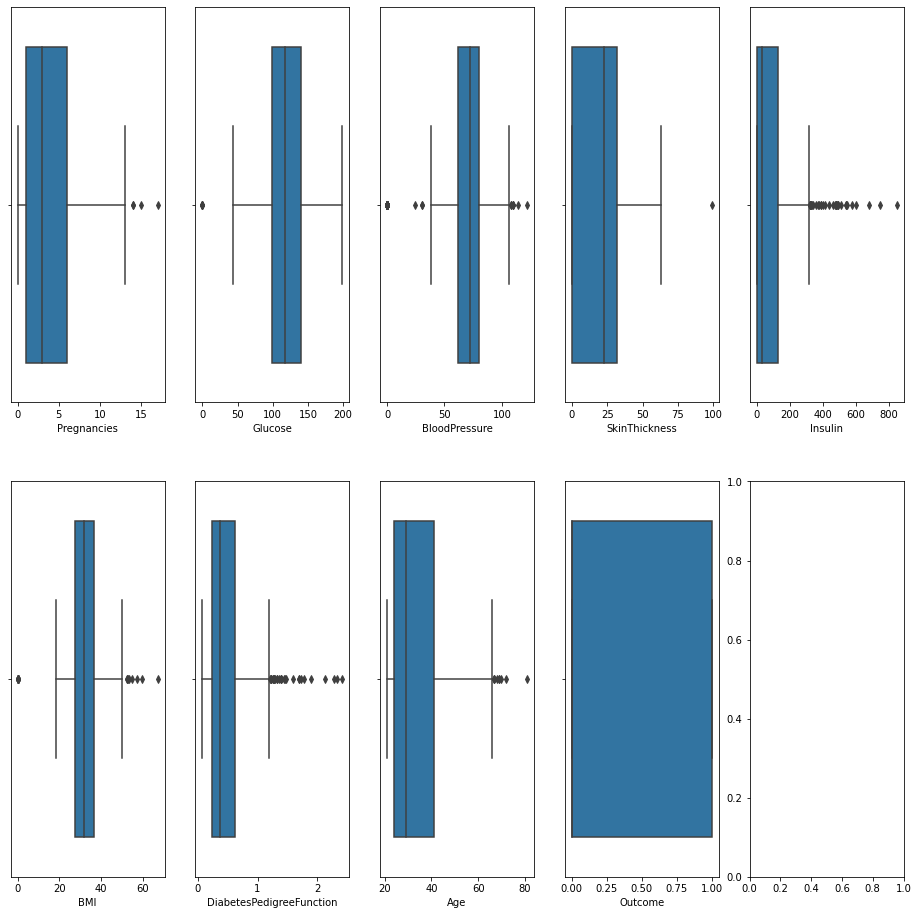

In [ ]:
display_plot(xline=diab.columns,dataset=diab,typ='box',fig=[16,16],rows=2,coll=5)

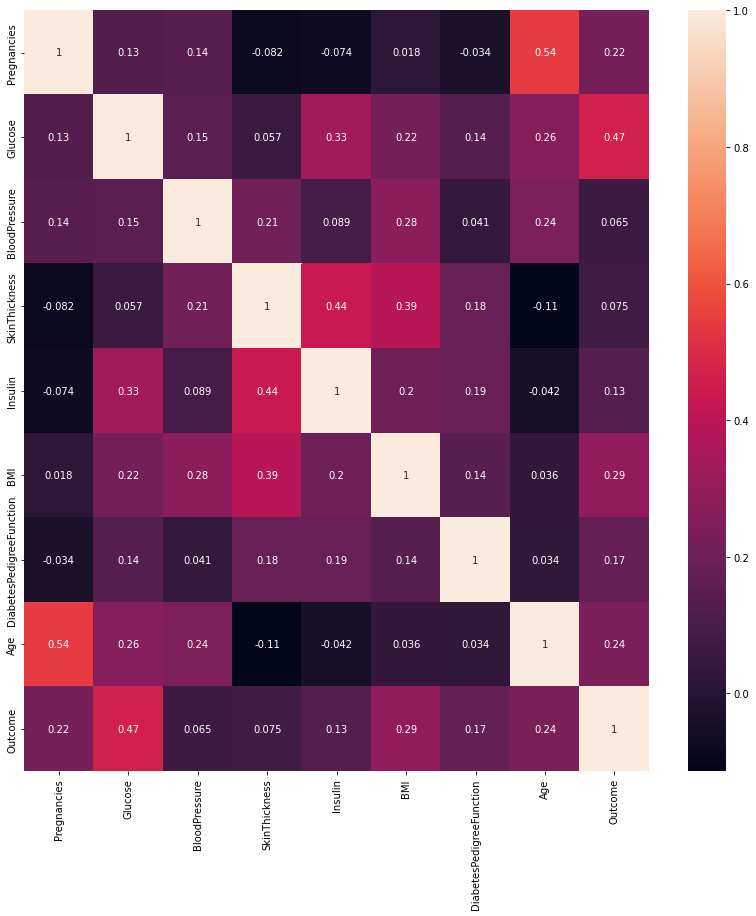

In [ ]:
plt.figure(figsize=[14,14])
sns.heatmap(diab.corr(),annot=True)
plt.show()

In [ ]:
diab=diab[diab['Glucose']>=50]
diab=diab[diab['Pregnancies']<=13]
diab=diab[diab['BloodPressure']>=40]
diab=diab[(diab['BloodPressure']<=100)]
diab=diab[diab['SkinThickness']<=75]
diab=diab[diab['Insulin']<=600]
diab=diab[diab['BMI']>=15]
diab=diab[diab['BMI']<50]
diab=diab[diab['DiabetesPedigreeFunction']<=1.5]
diab=diab[diab['Age']<=70]

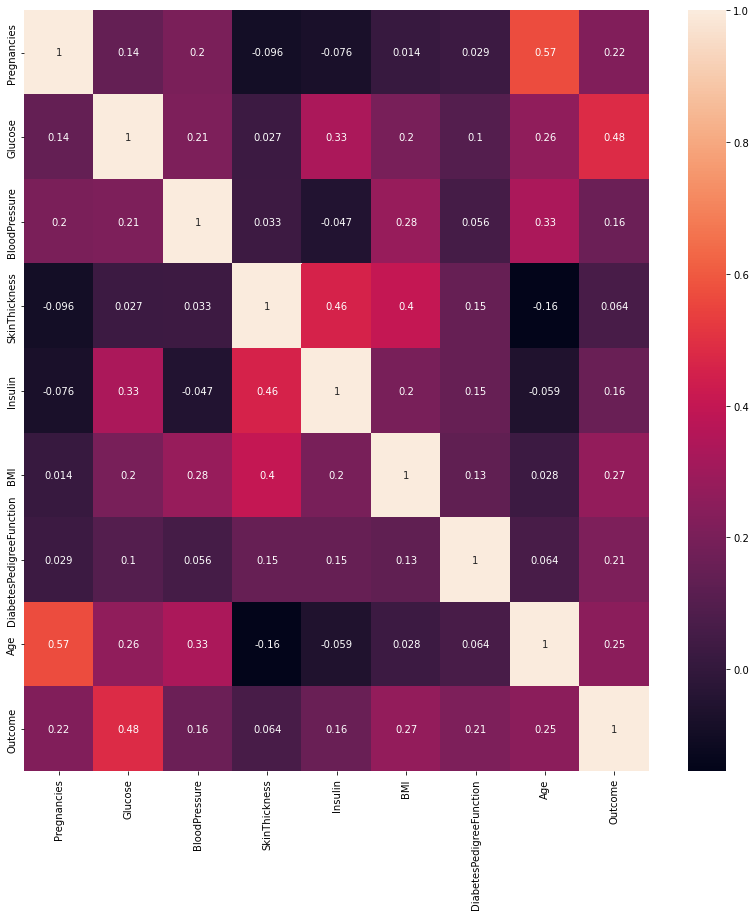

In [ ]:
plt.figure(figsize=[14,14])
sns.heatmap(diab.corr(),annot=True)
plt.show()

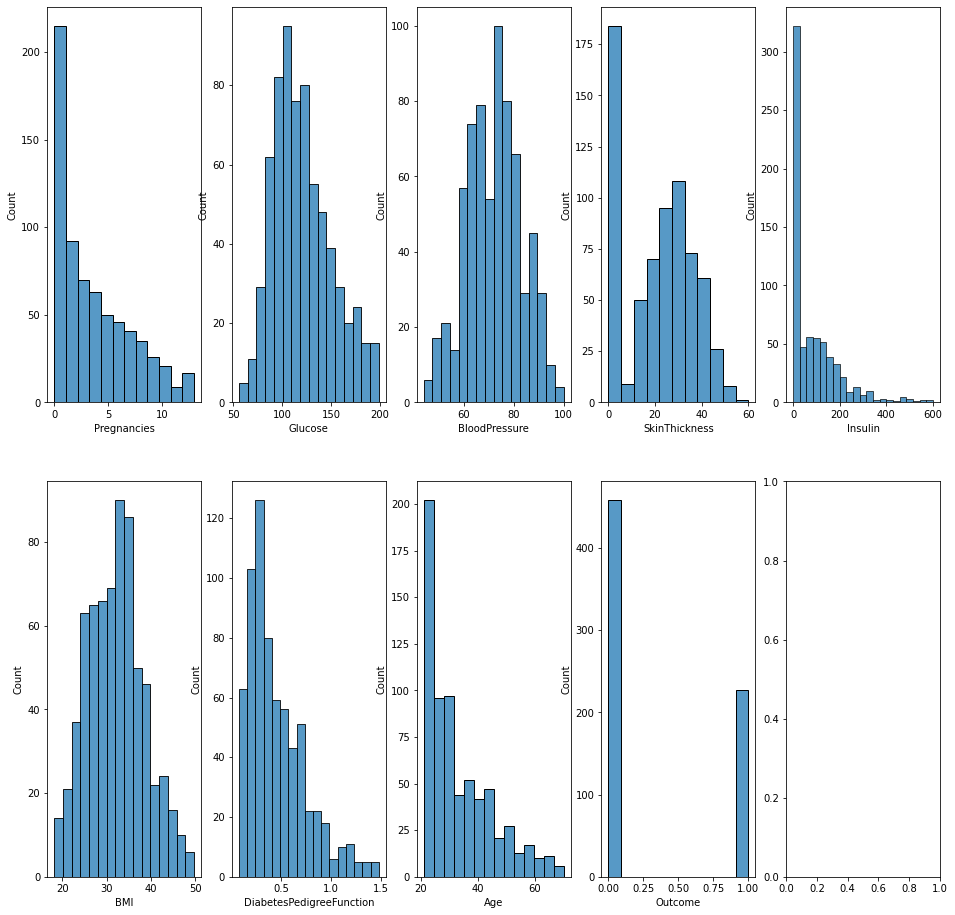

In [ ]:
display_plot(xline=diab.columns,dataset=diab,typ='hist',fig=[16,16],rows=2,coll=5)

In [ ]:
X2=diab.copy()
y2=X2.pop('Outcome')
diabscale=MinMaxScaler()
X2[X2.columns]=diabscale.fit_transform(X2[X2.columns])

In [ ]:
mod_selection(X2,y2)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

,model used,highest score,best hyperparameters
0,LogisticRegression(),0.779562,{'C': 1}
1,SVC(),0.776642,"{'C': 3, 'kernel': 'linear'}"
2,RandomForestClassifier(),0.776642,"{'criterion': 'gini', 'n_estimators': 100}"
3,DecisionTreeClassifier(),0.703650,"{'criterion': 'gini', 'splitter': 'best'}"
4,KNeighborsClassifier(),0.759124,{'n_neighbors': 10}


In [ ]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X2,y2)
mod_selection(X_sm,y_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

,model used,highest score,best hyperparameters
0,LogisticRegression(),0.736921,{'C': 5}
1,SVC(),0.799186,"{'C': 3, 'kernel': 'rbf'}"
2,RandomForestClassifier(),0.834111,"{'criterion': 'gini', 'n_estimators': 100}"
3,DecisionTreeClassifier(),0.756551,"{'criterion': 'entropy', 'splitter': 'best'}"
4,KNeighborsClassifier(),0.793692,{'n_neighbors': 2}


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.25,stratify=y_sm,random_state=42)
model2=RandomForestClassifier(criterion='entropy',n_estimators=100)
model2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
model_test(model2,y_test,X_test)

0.8209606986899564

# **Saving Models**

In [ ]:
pickle.dump(model2, open('diabetes_model.pkl', 'wb'))
pickle.dump(model1, open('parkinson_model.pkl', 'wb'))
pickle.dump(model, open('heart_model.pkl', 'wb'))
pickle.dump(hearscale,open('hearscale.pkl','wb'))
pickle.dump(parkscale,open('parkscale.pkl','wb'))
pickle.dump(diabscale,open('diabscale.pkl','wb'))

In [ ]:
type(hearscale)

sklearn.preprocessing._data.MinMaxScaler

In [ ]:
hr=pickle.load(open('/content/hearscale.pkl','rb'))
type(hr)

sklearn.preprocessing._data.MinMaxScaler

In [ ]:
hr.transform([[62,0,0,140,268,0,0,160,0,3.6,0,2,2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[0.6875    , 0.        , 0.        , 0.43396226, 0.48797251,
        0.        , 0.        , 0.67938931, 0.        , 0.81818182,
        0.        , 0.5       , 0.5       ]])